Google Colab上執行  
使用Lena，放在google colab的sample_data目錄下後再進行存取  
SourceCode@Google Colab: https://colab.research.google.com/drive/1LEqfY9dIELNNmGqqCb269m-4i_BwVhCJ

In [0]:
# _*_ coding: utf-8 _*_
# _*_ coding: cp950 _*_

# author: Chi-Hsu Chen (css920@gmail.com)

import numpy as np
import cv2
import time
from google.colab.patches import cv2_imshow

from keras import utils
from keras.preprocessing.image import ImageDataGenerator

# Part1 - ImageGenerator

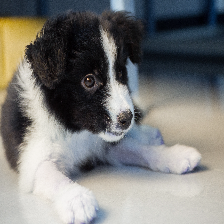

In [22]:
# 先定義image generator
imageGenerator=ImageDataGenerator(horizontal_flip=True,vertical_flip=True)

# 載入未處理原圖image Tano
imgTano=cv2.imread('sample_data/Tano.JPG',cv2.IMREAD_COLOR)
imgTano=cv2.resize(imgTano, (224,224))
imgTano=cv2.cvtColor(imgTano,cv2.COLOR_BGR2RGB)

cv2_imshow(imgTano)


Batch-1


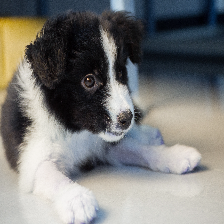

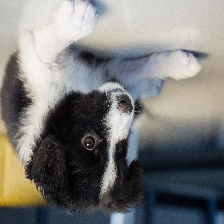

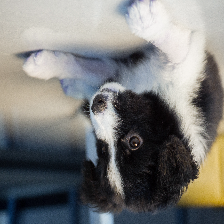

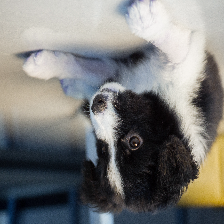

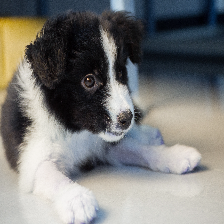

Batch-2


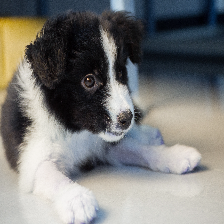

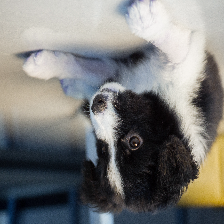

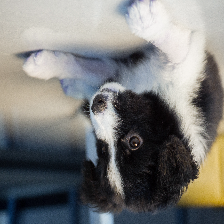

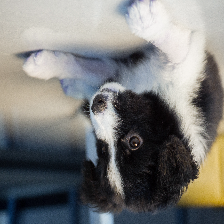

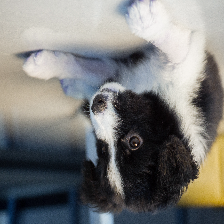

Batch-3


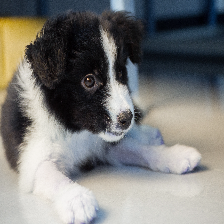

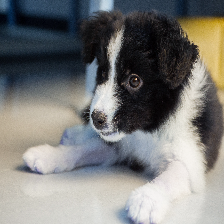

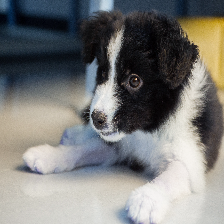

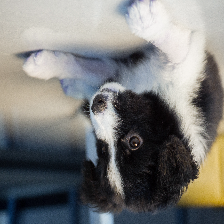

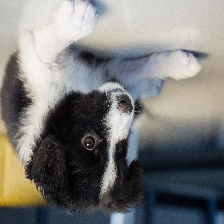

Batch-4


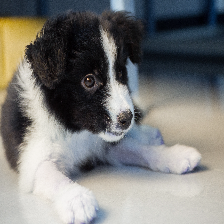

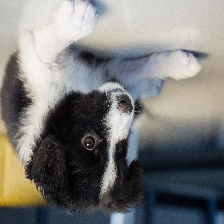

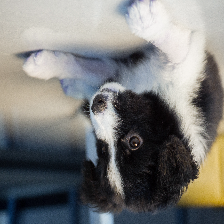

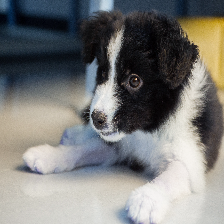

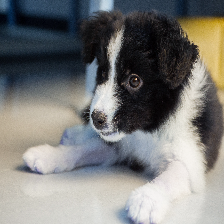

<Figure size 1440x720 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

# 先縮小尺寸處理速度比較快
imgTano=cv2.resize(imgTano, (224,224))

# 使用image generator針對原圖產生增強圖片
imgTanoArray=np.array(imgTano,dtype='float32')
imgTanoCombined=np.array([imgTanoArray,imgTanoArray,imgTanoArray,imgTanoArray],dtype='uint8')

# flow輸入是四維, 因為上面使用4張圖片，這邊則指定batch_size = 4
batchgen_img=imageGenerator.flow(imgTanoCombined,batch_size=4)

plt.figure(figsize=(20,10))
i=1
for batch in batchgen_img:
    #plt.subplot(1, 5, 1)
    #plt.imshow(imgTano)
    #plt.subplot(1, 5, i+1)
    #plt.imshow(batch[0, :, :, :].astype(np.uint8))
    #plt.imshow(batch[1, :, :, :].astype(np.uint8))
    #plt.imshow(batch[2, :, :, :].astype(np.uint8))
    #plt.imshow(batch[3, :, :, :].astype(np.uint8))
    #plt.axis('off')
    print('Batch-{}'.format(i))
    cv2_imshow(imgTano)
    cv2_imshow(batch[0, :, :, :].astype(np.uint8))
    cv2_imshow(batch[1, :, :, :].astype(np.uint8))
    cv2_imshow(batch[2, :, :, :].astype(np.uint8))
    cv2_imshow(batch[3, :, :, :].astype(np.uint8))
    
    i += 1
    if i > 4:
        break


# Part2 - imgaug 

In [20]:
# 安裝imgaug
!pip install imgaug

In [0]:
from imgaug import augmenters as iaa

# 載入未處理原圖image Tano
imgTano=cv2.imread('sample_data/Tano.JPG',cv2.IMREAD_COLOR)
imgTano=cv2.cvtColor(imgTano,cv2.COLOR_BGR2RGB)
imgTano=cv2.resize(imgTano, (224,224))

imgTanoAug=np.random.randint(0,255,(5,224,224,3),dtype=np.uint8)


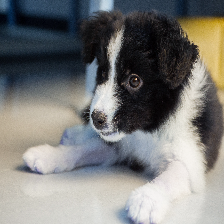

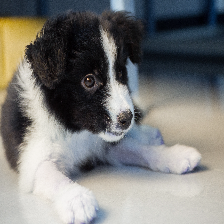

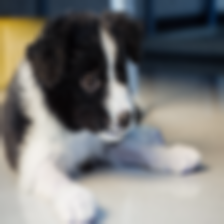

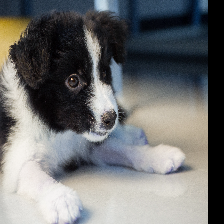

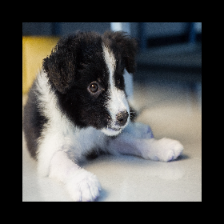

In [19]:
#水平翻轉機率==1.0
FlipperHorizontal=iaa.Fliplr(1)
imgTanoAug[0]=FlipperHorizontal.augment_image(imgTano)

#垂直翻轉機率40%
FlipperVertical=iaa.Flipud(0.4)
imgTanoAug[1]=FlipperVertical.augment_image(imgTano)

#高斯模糊圖像( sigma of 3.0)
Gaussian=iaa.GaussianBlur(3)
imgTanoAug[2]=Gaussian.augment_image(imgTano)

#向左橫移16個像素
shift=iaa.Affine(translate_px={'x':-16})
imgTanoAug[3]=shift.augment_image(imgTano)

# 縮放照片，區間(0.8-1.2倍)
scalar=iaa.Affine(scale=0.8)
imgTanoAug[4]=scalar.augment_image(imgTano)

for image in imgTanoAug:
  cv2_imshow(image.astype(np.uint))
